In [139]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [140]:
data = pd.read_csv('./ThoraricSurgery.csv', names= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R'])

In [141]:
data

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R
0,293,1,3.80,2.80,0,0,0,0,0,0,12.000,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14.000,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11.000,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,11.444,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12.000,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11.000,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12.000,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12.000,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11.000,0,0,0,0,0,58,1


In [142]:
# 1. 데이터 불러오기
# 2. 데이터 확인하기
# 3. x,y 나누기
# 4. 전체 데이터에서 학습데이터와 테스터데이터(0.2) 구분
# 5. 딥러닝 설계  ---> kernel_initializer 추가 he/xavier
# 6. model.complie
# 7. model.fit
# 8. 그래프 결과 확인
# 9. test 정확도 확인

In [143]:
x_data = data.copy()
y_data = x_data.pop('R')
X = x_data.copy()

In [145]:
x_train1, x_test, y_train1, y_test = train_test_split(x_data, y_data, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.3)

In [146]:
input_layer = tf.keras.layers.Input(shape=(17,))
x = tf.keras.layers.Dense(10, activation='sigmoid', kernel_initializer=tf.keras.initializers.he_normal())(input_layer) # he 초기화 방법
x = tf.keras.layers.Dense(10, activation='sigmoid', kernel_initializer=tf.keras.initializers.glorot_uniform)(x) # xavier초기화 방법
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=[input_layer], outputs=[output_layer])
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 17)]              0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)                180       
_________________________________________________________________
dense_48 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 11        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [147]:
loss = tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.SGD(learning_rate=0.4)
metrics = tf.keras.metrics.binary_accuracy
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics]) 

In [148]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 2, validation_data=(x_valid, y_valid))

Epoch 1/200
132/132 [==============================] - 1s 3ms/step - loss: 0.5169 - binary_accuracy: 0.8137 - val_loss: 0.3248 - val_binary_accuracy: 0.9204
Epoch 2/200
132/132 [==============================] - 0s 2ms/step - loss: 0.4806 - binary_accuracy: 0.8137 - val_loss: 0.3684 - val_binary_accuracy: 0.9204
Epoch 3/200
132/132 [==============================] - 0s 2ms/step - loss: 0.4881 - binary_accuracy: 0.8213 - val_loss: 0.2847 - val_binary_accuracy: 0.9204
Epoch 4/200
132/132 [==============================] - 0s 2ms/step - loss: 0.4855 - binary_accuracy: 0.8213 - val_loss: 0.3070 - val_binary_accuracy: 0.9204
Epoch 5/200
132/132 [==============================] - 0s 2ms/step - loss: 0.4853 - binary_accuracy: 0.8213 - val_loss: 0.3275 - val_binary_accuracy: 0.9204
Epoch 6/200
132/132 [==============================] - 0s 2ms/step - loss: 0.4850 - binary_accuracy: 0.8213 - val_loss: 0.2934 - val_binary_accuracy: 0.9204
Epoch 7/200
132/132 [==============================] - 0s 

In [149]:
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


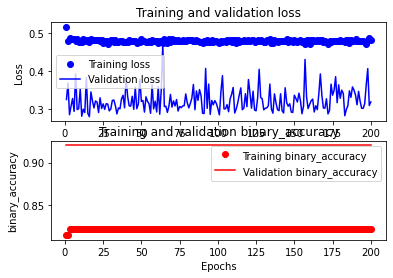

In [150]:
## history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = history.history['loss']
val_loss = history.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 binary_accuracy와 val_binary_accuracy key를 가지는 값들만 추출
rmse = history.history['binary_accuracy']
val_rmse = history.history['val_binary_accuracy']
epochs = range(1, len(rmse) + 1)
### binary_accuracy와 val_binary_accuracy key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training binary_accuracy')
plt.plot(epochs, val_rmse, 'r', label='Validation binary_accuracy')
plt.title('Training and validation binary_accuracy')
plt.xlabel('Epochs')
plt.ylabel('binary_accuracy')
plt.legend()

In [151]:
print("\n Test Accuracy : %.4f" %(model.evaluate(x_test, y_test)[1]))

3/3 [==============================] - 0s 4ms/step - loss: 0.4241 - binary_accuracy: 0.8511

 Test Accuracy : 0.8511
